# Summative Assignment 14
## 20193494 문서형


### 본 데이터에 대해서 발굴,분석,예측하고자 하는 목적을 작성해 봅니다.
이 데이터는 소프트웨어가 결함이 있을지 예측하는 문제다.  
주어진 feature는 코드의 길이, 복잡도, 줄 수, 연산자 수 등이다.  
feature가 label 없이 주어졌을 때 높은 정확도로 예측하는 모델을 만드는 것을 목표로 한다.  
model을 f, 데이터를 x, 실제 label을 y라고 할 때 


$$ if f(x) = y : k(x, y)  = 1$$
$$else: k(x, y) = 0  인 함수 k에 대하여$$
$$accuracy = \Sigma(k(x)) / n(x) $$

accuracy를 최대화 하는 함수 f를 찾는 것이 목적이다. 


## 0. 데이터 입력 및 처리

In [3]:
import os
import pandas as pd
import numpy as np
#Read the file. File should be in the same folder.
path = os.getcwd()
filepath = os.sep.join([path + '\\train.csv'])
print(filepath)
data = pd.read_csv(filepath, sep=',', header=0)
data

C:\Users\moons\Downloads\AI-W12-08-Intel-ML501-materials\2022-AI-W12-Intel-ML501-pdf\train.csv


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [25]:
#drop id. it doesn't contain any useful information
if 'id' in data.columns :
    data = data.drop(columns ='id')

#divide data into X, Y
X = data[data.columns[:-1]]
Y = data['defects']
X

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,45.09,7,0,1,0,11.0,8.0,16.0,12.0,3.0
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,626.01,23,0,2,0,18.0,20.0,67.0,40.0,9.0
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,327.43,20,0,4,0,10.0,8.0,51.0,28.0,1.0
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,85.22,7,0,1,0,11.0,14.0,24.0,19.0,3.0


## 1. NN

Nearest Neighbore에서 고려해야할 사항은 distance, K-value, scaling이 있습니다. 

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_data = data.drop(labels='defects', axis=1)
Y_data = data['defects']

msc = MinMaxScaler()
ssc = StandardScaler()

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])
    
def calculate_accuracy(scale, distance, K):
    score_list = list()
    
    if scale == 'minmax':
        x_data = pd.DataFrame(msc.fit_transform(X_data),columns=X_data.columns)
    else:
        x_data = pd.DataFrame(ssc.fit_transform(X_data),columns=X_data.columns)
        
    for k in K:
        if distance == 'manhattan':
            knn = KNeighborsClassifier(n_neighbors=k, p=1)
        else : 
            knn = KNeighborsClassifier(n_neighbors=k, p=2)
        knn = knn.fit(x_data, Y)

        y_pred = knn.predict(x_data)
        score = accuracy(Y_data, y_pred)

        score_list.append((k, score))

    score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
    return score_df


In [ ]:
minmax_manhattan_accuracy = calculate_accuracy('minmax', 'manhattan', range(1, 20))

1.0

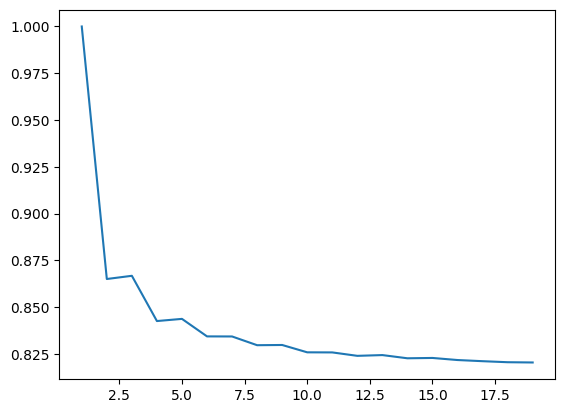

In [54]:
import matplotlib.pyplot as plt

plt.plot(minmax_manhattan_accuracy['k'], minmax_manhattan_accuracy['accuracy'])

사용하고자 하는 scaling method, distance를 패러미터로 넣어서 호출하면 k 값에 따른 accuracy 변화를 산출하는 함수를 만들었습니다.  
이를 이용해서 우선 minmax scale, manhattan distance를 사용해서 accuracy 변화를 관찰해보았습니다.  
k값이 커질수록 accuracy가 낮아지는 모습을 보였습니다.  

여러가지 scaling method, distance에 따른 최대 accuracy를 측정해보겠습니다.

In [51]:
standard_manhattan_accuracy = calculate_accuracy('standard', 'manhattan', range(1, 4))
minmax_euclidean_accuracy = calculate_accuracy('minmax', 'euclidean', range(1, 4))
standard_euclidean_accuracy = calculate_accuracy('standard', 'euclidean', range(1, 4))

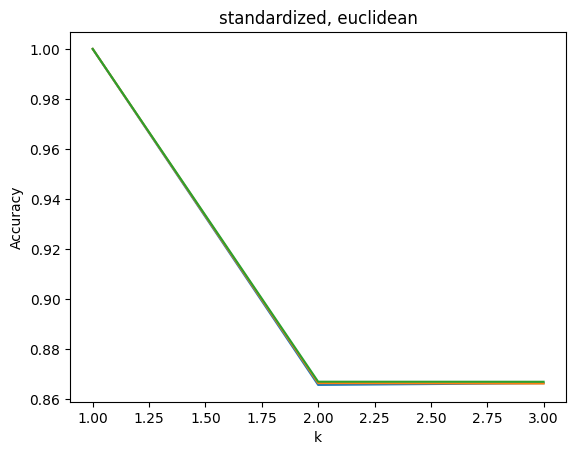

In [53]:
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("minmax, euclidean")
plt.plot(minmax_euclidean_accuracy['k'], minmax_euclidean_accuracy['accuracy'])
plt.title("standardized, manhattan")
plt.plot(standard_manhattan_accuracy['k'], standard_manhattan_accuracy['accuracy'])
plt.title("standardized, euclidean")
plt.plot(standard_euclidean_accuracy['k'],standard_euclidean_accuracy['accuracy'])

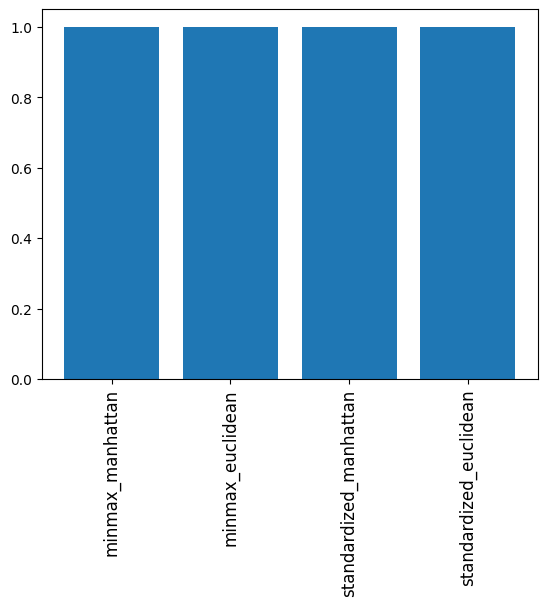

{'minmax_manhattan': [1.0], 'minmax_euclidean': [0.9999901732456787], 'standardized_manhattan': [1.0], 'standardized_euclidean': [1.0]}


In [81]:
maxee = {'minmax_manhattan': [max(minmax_manhattan_accuracy['accuracy'])], 
         'minmax_euclidean': [max(minmax_euclidean_accuracy['accuracy'])],
         'standardized_manhattan': [max(standard_manhattan_accuracy['accuracy'])], 
         'standardized_euclidean': [max(standard_euclidean_accuracy['accuracy'])]
        }
maxes = [max(minmax_manhattan_accuracy['accuracy']), max(minmax_euclidean_accuracy['accuracy']), 
         max(standard_manhattan_accuracy['accuracy']), max(standard_euclidean_accuracy['accuracy'])]
cols = ['minmax_manhattan', 'minmax_euclidean',  'standardized_manhattan', 'standardized_euclidean']
plt.bar(cols, maxes)
plt.xticks(fontsize=12, rotation=90) 
plt.show()
print(maxee)

#### euclidean 거리, minmax scale을 사용한 model 외에는 모두 정확도가 1에 다다른 모습입니다.  
#### 정확도가 1에 다다라 더이상 개선할 여지가 적다고 생각합니다.  

## 2. Naive Bayes

우선 아무런 과정 없이 Gaussian, Bernoullie, Multinomial model을 적용했다.

In [7]:
#try three models
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score

nb_data = data.copy()
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
simple_scores = {}
cv_N = 4
for key, model in nb.items():
    s = cross_val_score(model, X, Y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    simple_scores[key] = np.mean(s)
simple_scores

{'gaussian': 0.7990330418122433,
 'bernoulli': 0.7688747158921654,
 'multinomial': 0.7850299235634353}

#### 현재 사용해본 세가지 모델 모두 데이터를 분포로 나타내어 확률을 계산하는 Naive Bayes 모델입니다.   
#### 우선 data가 한쪽으로 몰려있는지 확인해보고 그렇다면 정규화를 통해 정확도를 더 높이고자 합니다.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

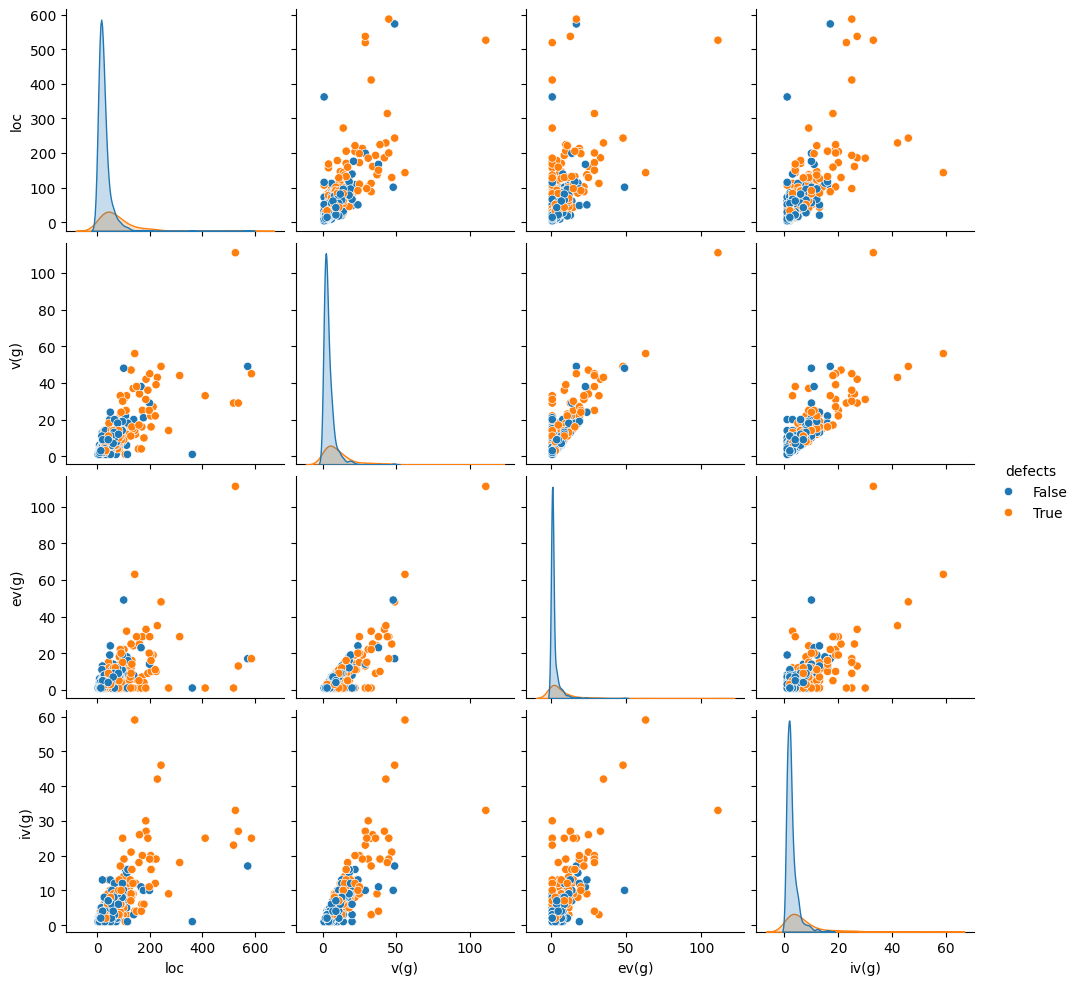

In [5]:
temp = pd.concat([nb_data.iloc[:, :4], nb_data['defects']], axis=1)
temp[0: 1000]
sns.pairplot(temp[0:1000], hue='defects')

#### 많은 데이터들이 0에 가깝게 몰려있는 모습을 확인했습니다.
#### 정규화를 한번 하고 나서 다시 데이터를 시각화하겠습니다.

In [9]:
skew = pd.DataFrame(nb_data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
loc,11.818912,True
v(g),14.258631,True
ev(g),6.513498,True
iv(g),28.209964,True
n,9.908514,True
v,15.959869,True
l,1.903337,True
d,5.618081,True
i,4.859743,True
e,47.676446,True


In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
for i, col in enumerate(nb_data.columns):
    if skew['too_skewed'][i] and not col == 'defects':  
        # skew['too_sekwed'][index]가 True이면 해당 열을 정규화합니다.'
        nb_data[col] = scaler.fit_transform(nb_data[[col]])

#### 정규화 한 데이터는 정수가 아니므로 multinomial, bernoulli를 적용하기에는 적합하지 않습니다.  
#### 따라서 GaussianNB만 적용해서 비교하겠습니다.

In [14]:
cv_N = 4
X = nb_data[nb_data.columns[:-1]]
Y = nb_data['defects']
s = cross_val_score(nb['gaussian'], X, Y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
s.mean()

0.8022169071231279

#### accuracy가 0.79에서 소폭 나아진 모습을 확인했습니다. 
#### Naive Bayes는 모든 특성이 독립적이다는 가정이 필요하지만 여기서 몇 가지 feature는 직관적으로 생각해도 의존적입니다.
#### 예를들어 loc (코드 라인 수) 는 lOCode, lOComment, lOBlank의 합과 관련 있을 수 밖에 없습니다. 
#### 직관적으로 의존성이 적어보이는 feature중 몇 가지만 선택해서 돌려았습니다.
#### 여러가지 조합중 제가 찾은 최적의 조합은 다음과 같습니다.

In [11]:
X = nb_data[['loc', 'branchCount']]
Y = nb_data['defects']
cv_N = 4
scores ={}
for key, model in nb.items():
    s = cross_val_score(model, X, Y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.8044377553385945,
 'bernoulli': 0.7856981463338903,
 'multinomial': nan}

#### 몰려서 나타나는 데이터의 정규화, 3가지의 NB 모델 적용, feature 선택을 여러가지로 변화시키며 최적의 값을 찾으려 노력했습니다.
#### 제가 찾은 NB model의 accuracy 최대값은 0.804 입니다. 

## 3. SVM


#### SVM은 학습 시간이 많이 걸린다는 단점이 있습니다. 
#### 그렇기 때문에 모든 feature를 다 사용하기에는 무리가 있을 것이라고 판단했습니다.
#### Feature를 2개 뽑아서 사용하는 것이 시각화, 분석에도 유리할 것이라고 판단하여 2개 고르는 것으로 정했습니다.
#### 선택 기준은 correlation의 절대값이 높은 것 입니다. 

Index(['branchCount', 'loc'], dtype='object')

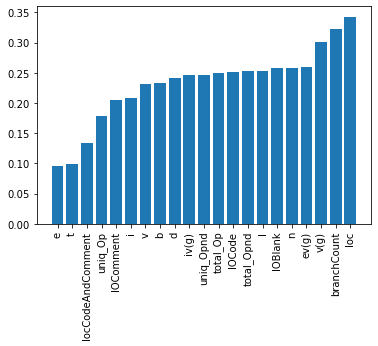

In [15]:
cols = list(data.columns[:-1])  # everything except "color"
Y = data['defects']
correlations = data[cols].corrwith(Y)
correlations.map(abs)
plt.xticks(rotation=90)
correlations['l'] = abs(correlations['l'])
correlations.sort_values(inplace=True)
plt.bar(correlations.index, correlations.values)
fields = correlations.map(abs).sort_values().iloc[-2:].index
fields

#### correlation의 절대값이 가장 높은 feature 는 branchCount, loc 입니다. 
#### 이 두가지 feature에 linear SVM과 kernel등을 적용시켜보며 최적의 모델을 찾아보겠습니다. 

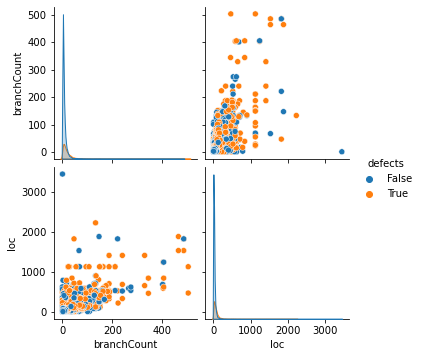

In [17]:
svm_data = data[fields]
sns.pairplot(pd.concat([svm_data, data['defects']], axis=1), hue='defects')

많은 데이터가 몰려있는 모습을 확인했습니다.
정규화를 적용하겠습니다. 

<ipython-input-19-1bd9dbef1c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_data[f] = scaler.fit_transform(svm_data[[f]])
<ipython-input-19-1bd9dbef1c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_data[f] = scaler.fit_transform(svm_data[[f]])


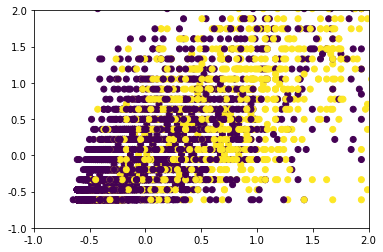

In [19]:
for f in fields:
    svm_data[f] = scaler.fit_transform(svm_data[[f]])
withy = pd.concat([svm_data, data['defects']], axis = 1)
plt.xlim([-1, 2])      
plt.ylim([-1, 2])
plt.rc('axes', unicode_minus=False)
plt.scatter(svm_data['loc'][0:10000].to_numpy(), 
            svm_data['branchCount'][0:10000].to_numpy(), 
            c = data['defects'][0:10000].to_numpy())
plt.show()

In [20]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


LSVC = LinearSVC()
x_train, x_test, y_train, y_test = train_test_split(svm_data, Y, test_size=0.2, shuffle=True, 
                                                    stratify=Y, random_state=1)
LSVC.fit(x_train, y_train)

C:\Users\moons\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

#### 데이터를 train, test를 위한 데이터로 각각 나눠서 train 시켰습니다.

In [140]:
predicted = LSVC.predict(x_test)
accuracy(predicted, y_test)

0.8030265808480322

#### 0.803의 정확도가 나왔습니다. Gaussian kernel을 사용해보겠습니다.

In [145]:
gammas = [.5, 1, 2, 10]
accuracies = {}
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    SVC_Gaussian.fit(x_train, y_train)
    predicted = SVC_Gaussian.predict(x_test)
    accuracies[gamma] = accuracy(predicted, y_test)
    

In [146]:
accuracies

{0.5: 0.812754876430993,
 1: 0.8134918685206112,
 2: 0.8137866653564585,
 10: 0.8135410013265858}

#### 기존 0.80의 accuracy에 비해 정확도가 소폭 상승한 모습을 확인했습니다.
#### 기록한 최대 accuracy는 0.8137입니다.

## 4. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, 
                                                    stratify=Y, random_state=1)
x_train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
8971,58.0,11.0,1.0,10.0,184.0,1048.88,0.04,28.00,38.50,31267.11,...,1737.06,40,6,7,1,17.0,28.0,105.0,84.0,21.0
96328,15.0,4.0,4.0,3.0,65.0,315.77,0.06,16.00,18.65,43984.79,...,257.93,10,0,2,0,16.0,12.0,41.0,24.0,7.0
19888,117.0,20.0,15.0,7.0,309.0,1795.52,0.03,36.58,52.53,72743.90,...,4041.33,77,25,14,1,22.0,48.0,187.0,142.0,39.0
19373,7.0,2.0,1.0,1.0,21.0,79.95,0.18,5.60,13.33,479.73,...,26.65,4,0,1,0,8.0,5.0,14.0,7.0,3.0
99390,21.0,5.0,3.0,2.0,90.0,450.00,0.05,21.31,21.29,10683.67,...,593.54,17,0,3,0,17.0,13.0,49.0,37.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44402,5.0,1.0,1.0,1.0,11.0,34.87,0.40,2.50,17.43,69.74,...,3.87,3,0,0,0,4.0,5.0,6.0,5.0,1.0
87571,14.0,2.0,1.0,2.0,54.0,240.81,0.12,8.03,27.17,2287.69,...,127.09,11,0,1,0,11.0,13.0,33.0,21.0,3.0
90479,73.0,10.0,3.0,8.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,19.0
36348,6.0,1.0,1.0,1.0,15.0,51.89,0.21,4.67,11.86,186.03,...,10.33,4,0,0,0,7.0,3.0,9.0,4.0,1.0


In [27]:
dt = DecisionTreeClassifier(random_state=40)
dt = dt.fit(x_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(29009, 62)

In [161]:
predicted = dt.predict(x_test)
accuracy(predicted, y_test)

0.7234805679752371

기본 설정으로 decision tree 모델을 생성했습니다.  
29009개의 node, 최대 62의 depth를 가지는 tree가 생성됐습니다.  
정확도는 0.723입니다.

앞으로는 parameter를 변화시켜 그 중에 가장 좋은 모델을 선정하고자 합니다.

In [203]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, dt.max_features_),
              'min_samples_leaf': range(2, 10)
             }

GridSearch를 이용하여 여러가지 hyper parameter의 조합에 대해 가장 좋은 tree를 찾겠습니다.  
최대 깊이, 최대 feature, 노드당 최소 샘플 개수, 노드 생성 최소 샘플 수의 조합을 grid search 하겠습니다.

In [204]:
GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,s
                  scoring='accuracy',
                  n_jobs=-1)

In [206]:
GR = GR.fit(x_train, y_train)
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(63, 5)

In [207]:
gr_predicted = GR.predict(x_test)
accuracy(gr_predicted, y_test)

0.813835798162433

search 결과 63개의 node, 5의 max_depth를 가질 때 최대의 정확도를 가지는 것을 확인했습니다.  
Decision Tree로 얻은 최대 accuracy는 0.81입니다.